# Testing a general data reader for AQUA 
## (working on Levante for now)

The idea of this AQUA reader draft is to provide a first common access point to data in order to quickly develop diagnostics. For now access is through intake catalogues of NextGEMS data, but the idea is to extend this to FDB access and other datasources in the future.

It includes also regridding functionality. The idea of the regridder (which uses sparse matrix multiplication) is to generate first the weights for the interpolation (an operation which needs to be done only once) and then to use them for each regridding operation.

In [1]:
from aqua import Reader
from aqua.reader import catalogue

First let's see what is available (this function also returns the intake catalogue, that's why we use a semicolon)

In [2]:
catalogue();

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	
	- ICMU_atm2d	
	- ICMU_atm3d	
	- interpolated_global	
	- interpolated_np	
	- interpolated_sp	
	- interpolated_sp_ci	
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	
	- ICMU_atm2d	
	- ICMU_atm3d	
	- interpolated_global	
	- interpolated_np	
	- interpolated_sp	
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	
	- ICMU_atm2d	
	- ICMU_atm3d	

FESOM	tco3999-ng5	2.5km experiment, coupuled with IFS
	- elem_grid	
	- node_grid	
	- np	nearest-neighbor interpolation to lat-lon grid
	- interpolated_global2d	
	- interpolated_global_TS	
	- interpolated_global_UV	
	- interpolated_np	
	- interpolated_sp	
	- original_2d	original 2d output
	- original_3d	original 3d output
FESOM	tco2559-ng5	5km experiment, coupuled with IFS
	- elem_grid	
	- node_grid	
	- interpolated_global2d	
	- interpolated_global_TS	
	- interpolated_global_UV	
	- interpolated_np	
	- interpolated_sp	
	- original_2d	orig

## Example 1: IFS

Now let's load some IFS data

In [3]:
reader = Reader(model="IFS", exp="tco2559-ng5", source="ICMGG_atm2d")
data = reader.retrieve()

These are raw IFS data on the original grid

In [4]:
data

<xarray.Dataset>
Dimensions:  (time: 8329, value: 26306560, level: 5)
Coordinates:
    lat      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
  * level    (level) int64 1 2 3 4 5
    lon      (value) float64 dask.array<chunksize=(26306560,), meta=np.ndarray>
  * time     (time) datetime64[ns] 2020-01-20 2020-01-20T01:00:00 ... 2021-01-01
Dimensions without coordinates: value
Data variables: (12/81)
    100si    (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    100u     (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    100v     (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    10u      (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    10v      (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    2d       (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    ...       ...
    uvb      (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    vike     (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    vipie    (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    vipile   (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    vithe    (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
    z        (time, value) float64 dask.array<chunksize=(1, 26306560), meta=np.ndarray>
Attributes:
    edition:            1
    centre:             ecmf
    centreDescription:  European Centre for Medium-Range Weather Forecasts
    subCentre:          0
    history:            🪄🧙‍♂️🔮 magic dataset assembly provided by gribscan.IF...

## Example 2: ICON

Instantiate a reader for ICON data specifying that we will want to interpolate to a 1 deg grid (the grids are defined in the regrid.yaml file and the weights saved in a special directory). If the weights file does not already exist in our collection it will be created automatically.

In [2]:
reader = Reader(model="ICON", exp="ngc2009", source="atm_2d_ml_R02B09", regrid="r100")

Weights file not found: /work/bb1153/b382075/nextgems/weights/weights_ICON_ngc2009_ycon_r100.nc
Attempting to generate it ...
Success!


Load the actual data. By default these data have not been regridded yet. 

You could ask to regrid them directly by specifying the argument `regrid=True` but please be warned that without a selection on dates this will take longer. It is usuallymore efficient to first load the data, select and then regrid.

In [3]:
data = reader.retrieve()

By default these data have not been regridded yet

In [4]:
data

<xarray.Dataset>
Dimensions:   (time: 37009, cell: 20971520)
Coordinates:
  * time      (time) datetime64[ns] 2020-01-20 ... 2022-03-01
Dimensions without coordinates: cell
Data variables: (12/34)
    cfh_lnd   (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    clivi     (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    cllvi     (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    cptgzvi   (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    hfls      (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    hfss      (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    ...        ...
    tas       (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    tauu      (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    tauv      (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    ts        (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    uas       (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
    vas       (time, cell) float32 dask.array<chunksize=(6, 1048576), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.3rc (http://mpim...
    Conventions:          CF-1.6
    comment:              Sapphire Dyamond (k203123) on l40687 (Linux 4.18.0-...
    grid_file_uri:        http://icon-downloads.mpimet.mpg.de/grids/public/mp...
    history:              ./icon at 20220512 152214
    institution:          Max Planck Institute for Meteorology/Deutscher Wett...
    number_of_grid_used:  15
    references:           see MPIM/DWD publications
    source:               git@gitlab.dkrz.de:icon/icon-aes.git@87a1eaded69e87...
    title:                ICON simulation
    uuidOfHGrid:          0f1e7d66-637e-11e8-913b-51232bb4d8f9

Now we actually regrid part of the data (the first 16 frames)

In [5]:
tasr = reader.regrid(data.tas[0:16]) 

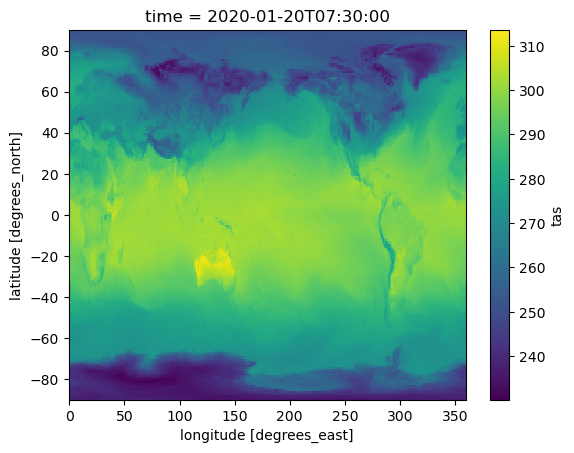

In [6]:
tasr[15,:,:].plot()

In [33]:
tasr.to_netcdf("test.nc")

## Example 3: Healpix data (ICON)

We can also read healpix data (interpolation not implemented yet)

In [7]:
reader = Reader(model="ICON", exp="hpx")
data = reader.retrieve()

In [8]:
data

<xarray.Dataset>
Dimensions:             (time: 8640, pix: 3145728, level: 90)
Coordinates:
  * level               (level) float64 nan 1.0 2.0 3.0 ... 86.0 87.0 88.0 89.0
  * time                (time) datetime64[ns] 2020-07-23T00:30:00 ... 2021-01-19
Dimensions without coordinates: pix
Data variables:
    10m_wind_speed      (time, pix) float32 dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    cli                 (time, level, pix) float32 dask.array<chunksize=(1, 10, 262144), meta=np.ndarray>
    clivi               (time, pix) float32 dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    cllvi               (time, pix) float32 dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    clw                 (time, level, pix) float32 dask.array<chunksize=(1, 10, 262144), meta=np.ndarray>
    sea_level_pressure  (time, pix) float32 dask.array<chunksize=(1, 1048576), meta=np.ndarray>
    tas                 (time, pix) float32 dask.array<chunksize=(1, 1048576), meta=np.ndarray>

## Example 4: FESOM data (interpolated)

In [11]:
reader = Reader(model="FESOM", exp="tco2559-ng5", source="interpolated_global_TS")
data = reader.retrieve()

In [11]:
data.tas

<xarray.DataArray 'tas' (time: 8640, pix: 3145728)>
dask.array<concatenate, shape=(8640, 3145728), dtype=float32, chunksize=(1, 1048576), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2020-07-23T00:30:00 ... 2021-01-19
Dimensions without coordinates: pix

In [13]:
cat = catalogue(verbose=False)